In [1]:
import os 
# Go one folder back
os.chdir('..')
from Python_scripts.data_processing_adults import *
from Python_scripts.log_likelihood import *

/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
subjects_dataframe_gain = data_processing_adults_func()

number_of_subjects = len(subjects_dataframe_gain)

print(number_of_subjects)

81


In [8]:
best_alphas = []
best_cs = []

for subject in range(number_of_subjects):
    l = Log_Likelihood(subjects_dataframe_gain[subject])
    best_alphas.append(l.best_alpha)
    best_cs.append(l.best_c)

0    1
Name: Subject, dtype: int64
40    3
Name: Subject, dtype: int64
80    6
Name: Subject, dtype: int64
120    12
Name: Subject, dtype: int64
160    18
Name: Subject, dtype: int64
200    22
Name: Subject, dtype: int64
240    25
Name: Subject, dtype: int64
280    26
Name: Subject, dtype: int64
320    30
Name: Subject, dtype: int64
360    31
Name: Subject, dtype: int64
400    32
Name: Subject, dtype: int64
440    37
Name: Subject, dtype: int64
480    38
Name: Subject, dtype: int64
520    42
Name: Subject, dtype: int64
560    43
Name: Subject, dtype: int64
600    44
Name: Subject, dtype: int64
640    47
Name: Subject, dtype: int64
680    48
Name: Subject, dtype: int64
720    52
Name: Subject, dtype: int64
760    53
Name: Subject, dtype: int64
800    58
Name: Subject, dtype: int64
840    59
Name: Subject, dtype: int64
880    62
Name: Subject, dtype: int64
920    66
Name: Subject, dtype: int64
960    67
Name: Subject, dtype: int64
1000    68
Name: Subject, dtype: int64
1040    69
Name: S

In [4]:
class All_persons():
    def __init__(self, Personrange, startegy):
        allpersons=[None]*len(Personrange)
        self.startegy=startegy
        for i in Personrange: 
            allpersons[i]=startegy(subjects_dataframe_gain[i],min_c=1,max_c=1,number_of_c = 1)
        self.allpersons=allpersons

    def plot_all(self):
        for person in self.allpersons:
            person.plot()
            

    def plot_all_x2(self):
        for person in self.allpersons:
            person.plot_x2()
            
    def best_alpha_list(self):
        best_alphas = []
        for person in self.allpersons:
            best_alphas.append(person.best_alpha)
        return best_alphas

    def get_person(self,person_nr):
        return self.allpersons[person_nr]

In [5]:
a=All_persons(range(number_of_subjects),Log_Likelihood)

0    1
Name: Subject, dtype: int64
40    3
Name: Subject, dtype: int64
80    6
Name: Subject, dtype: int64
120    12
Name: Subject, dtype: int64
160    18
Name: Subject, dtype: int64
200    22
Name: Subject, dtype: int64
240    25
Name: Subject, dtype: int64
280    26
Name: Subject, dtype: int64
320    30
Name: Subject, dtype: int64
360    31
Name: Subject, dtype: int64
400    32
Name: Subject, dtype: int64
440    37
Name: Subject, dtype: int64
480    38
Name: Subject, dtype: int64
520    42
Name: Subject, dtype: int64
560    43
Name: Subject, dtype: int64
600    44
Name: Subject, dtype: int64
640    47
Name: Subject, dtype: int64
680    48
Name: Subject, dtype: int64
720    52
Name: Subject, dtype: int64
760    53
Name: Subject, dtype: int64
800    58
Name: Subject, dtype: int64
840    59
Name: Subject, dtype: int64
880    62
Name: Subject, dtype: int64
920    66
Name: Subject, dtype: int64
960    67
Name: Subject, dtype: int64
1000    68
Name: Subject, dtype: int64
1040    69
Name: S

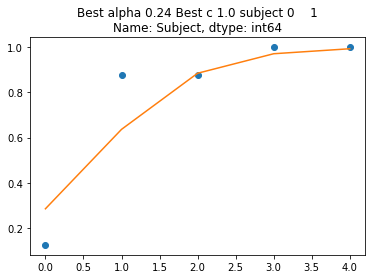

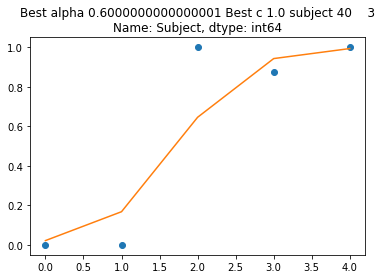

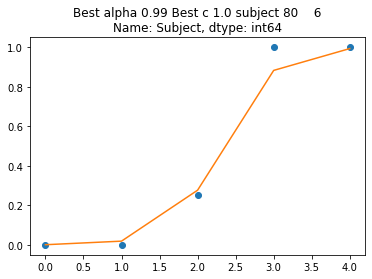

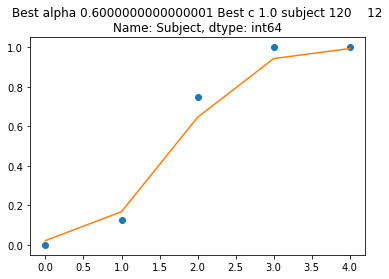

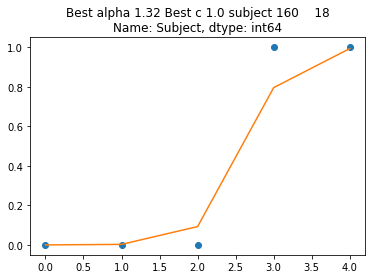

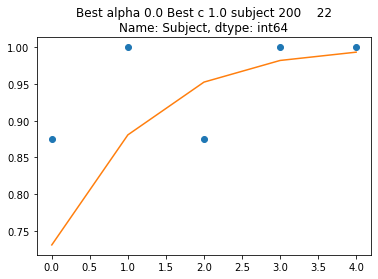

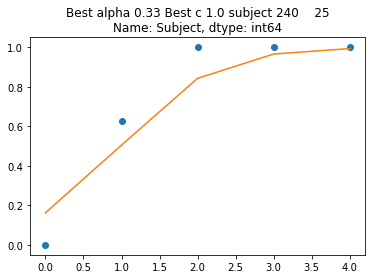

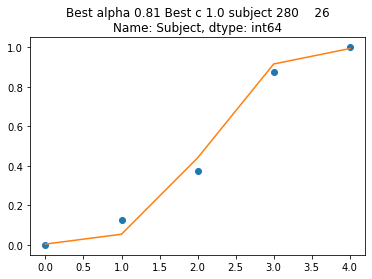

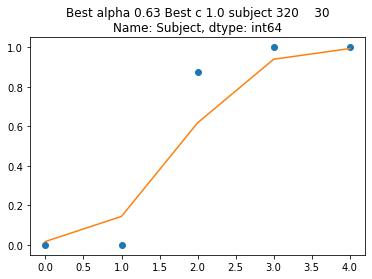

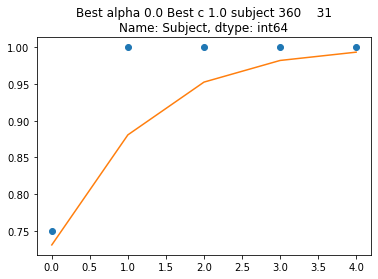

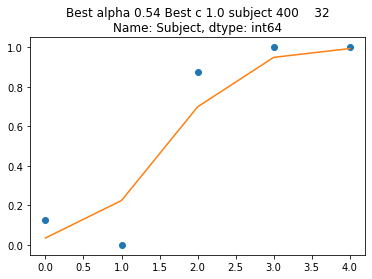

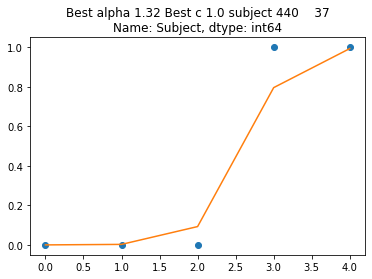

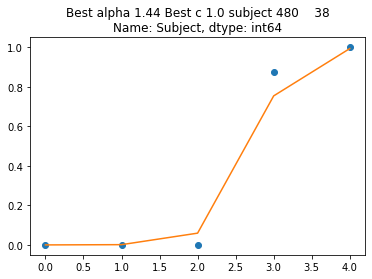

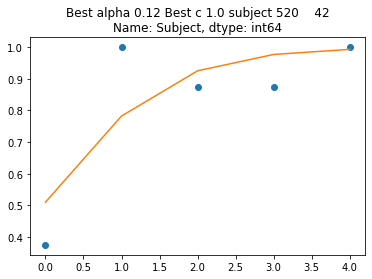

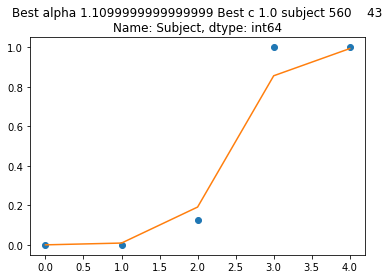

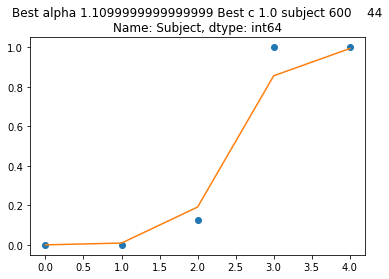

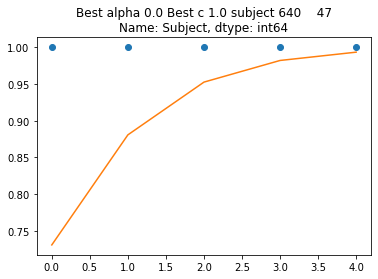

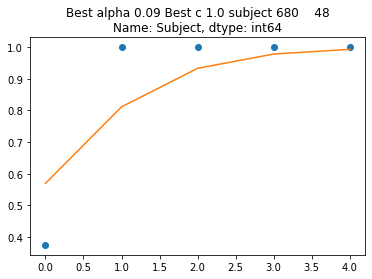

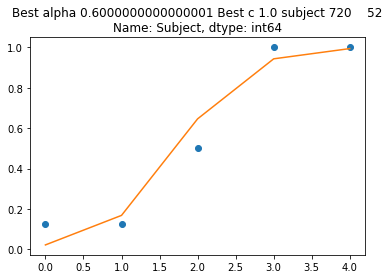

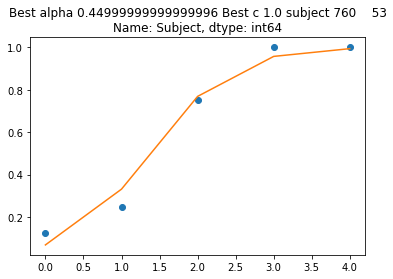

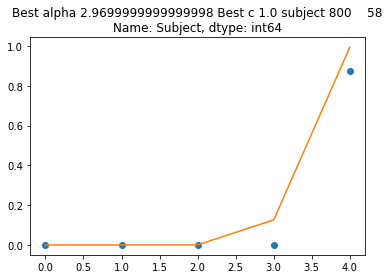

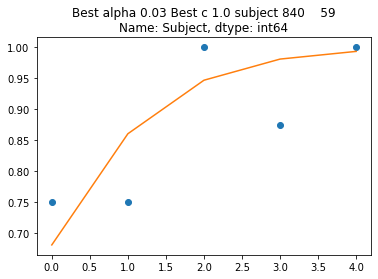

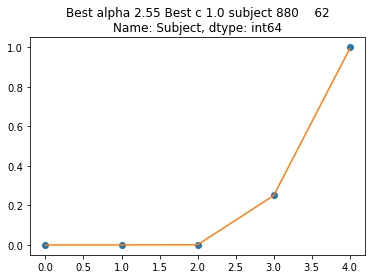

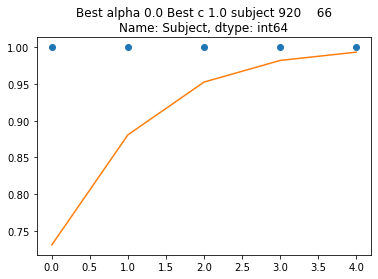

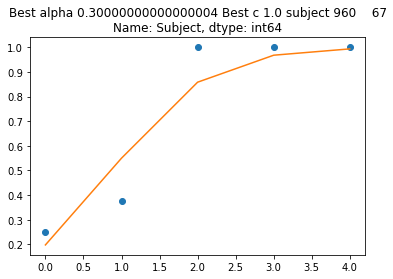

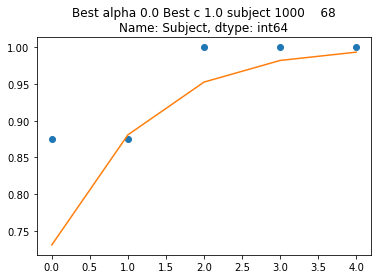

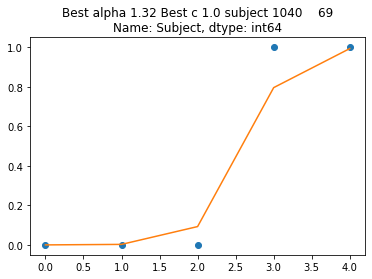

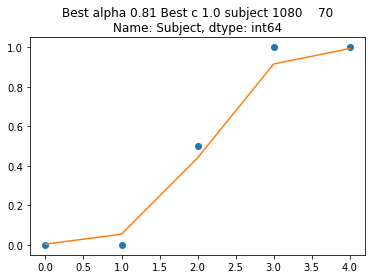

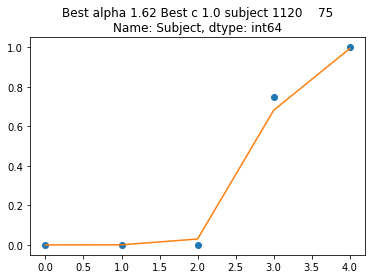

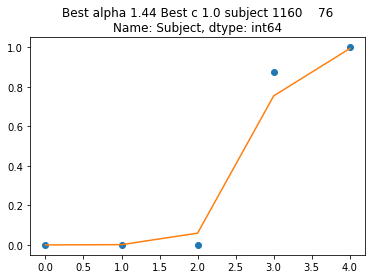

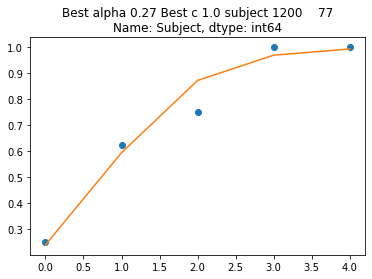

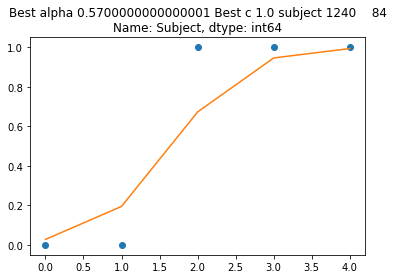

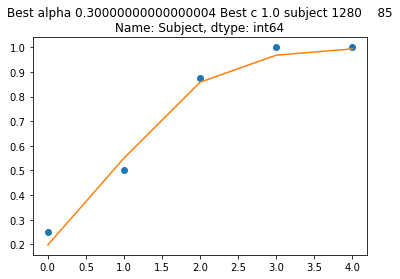

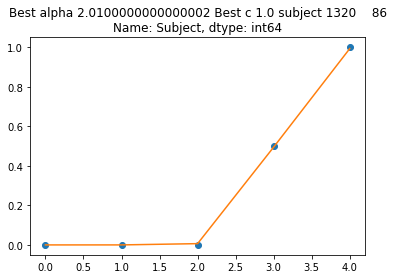

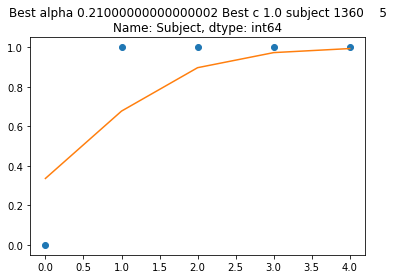

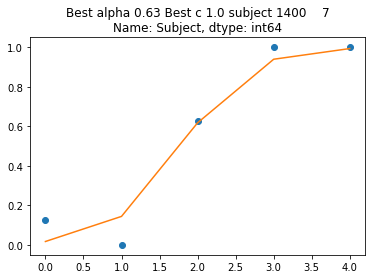

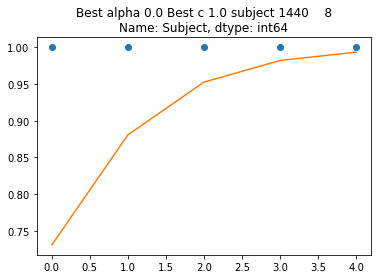

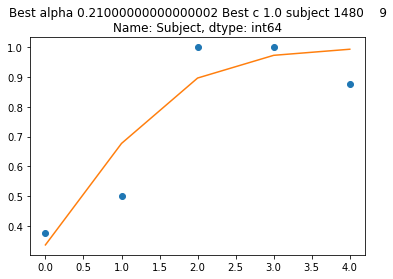

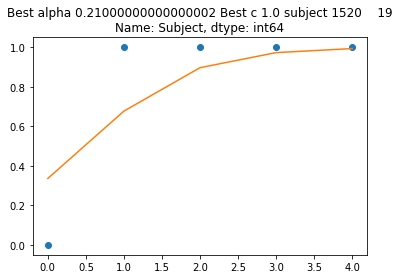

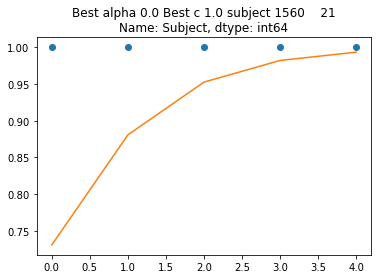

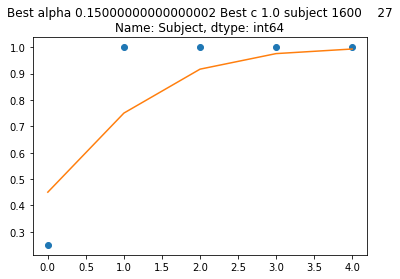

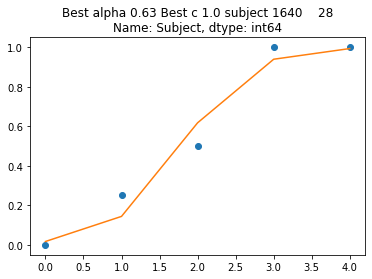

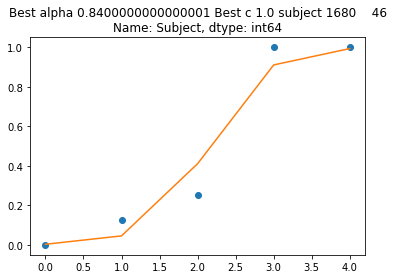

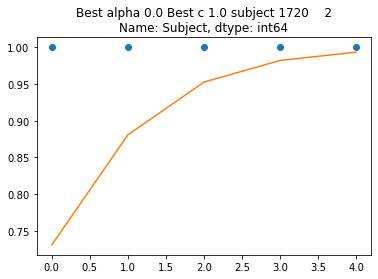

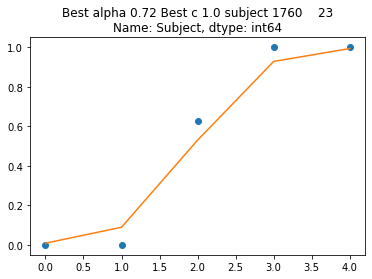

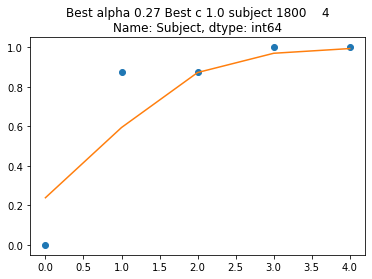

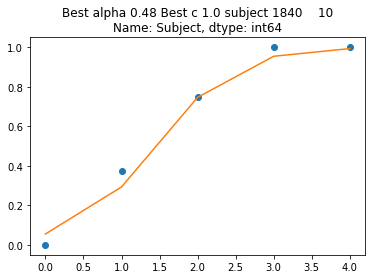

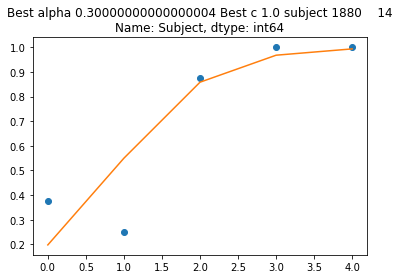

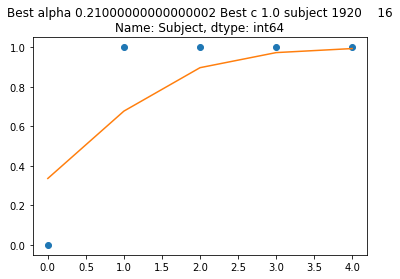

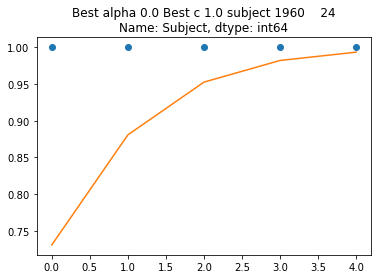

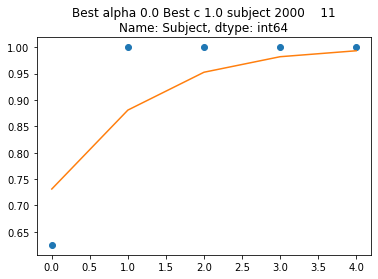

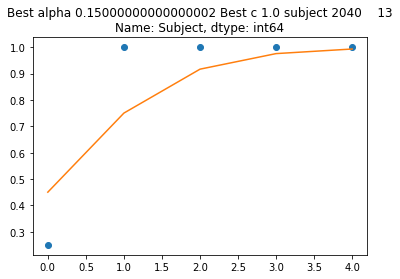

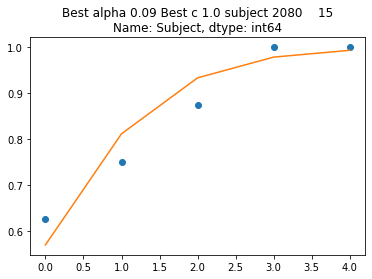

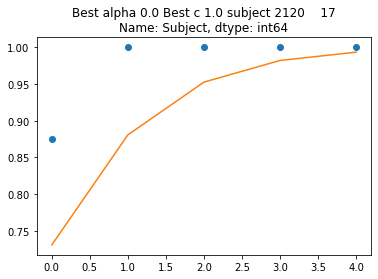

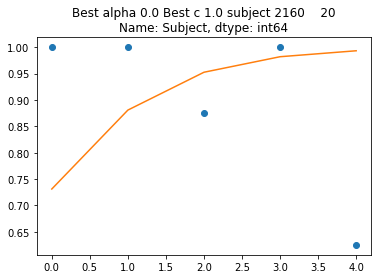

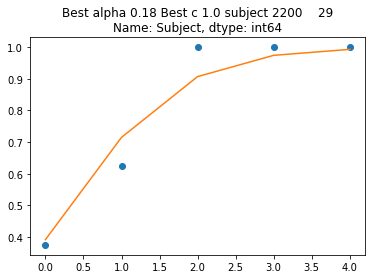

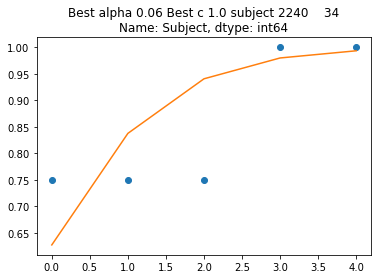

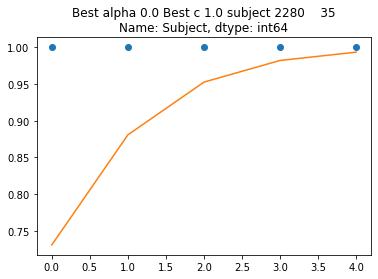

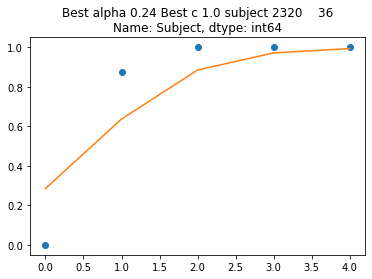

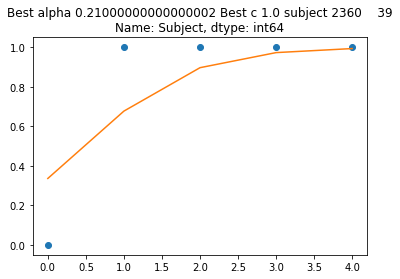

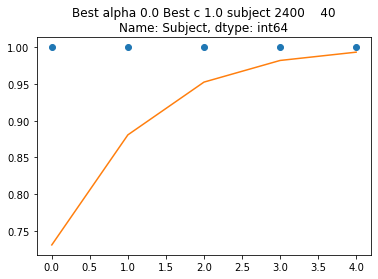

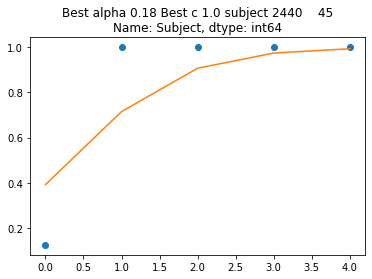

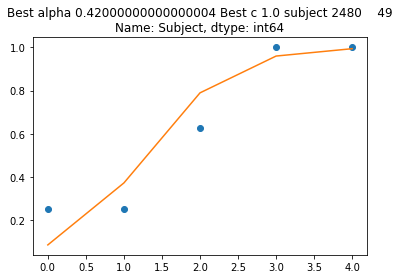

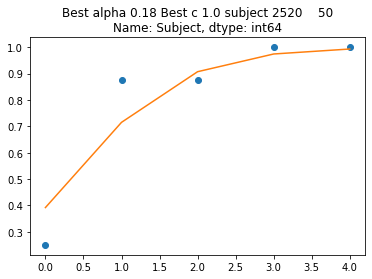

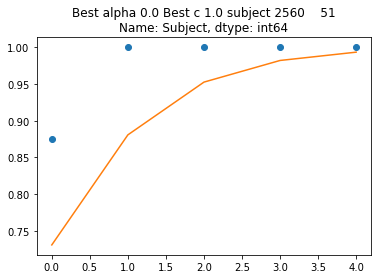

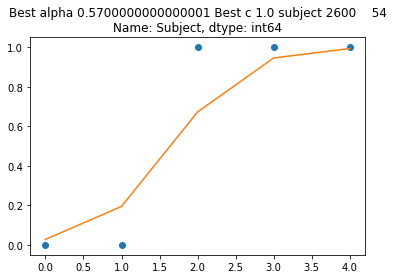

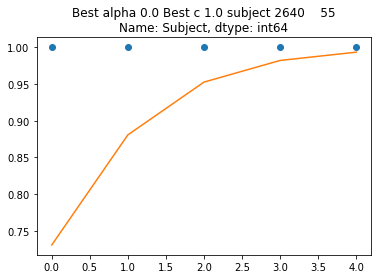

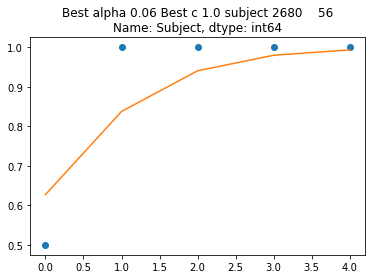

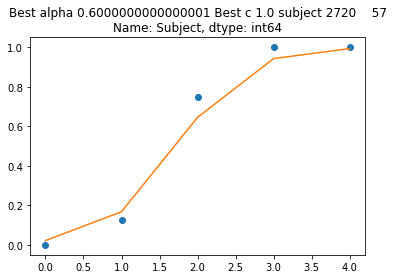

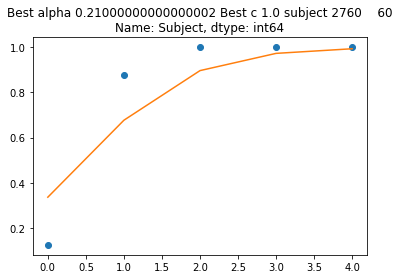

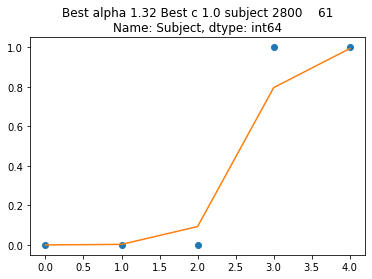

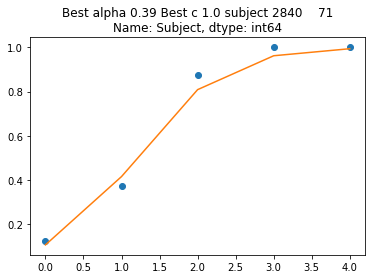

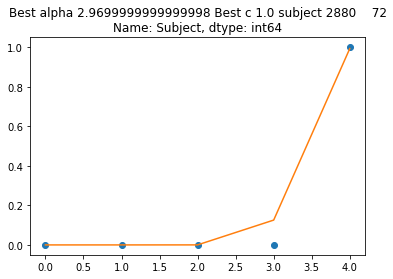

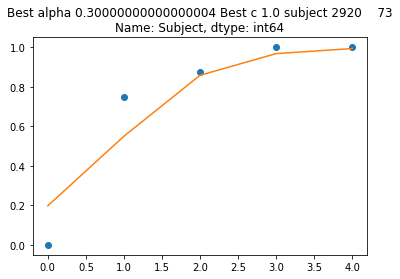

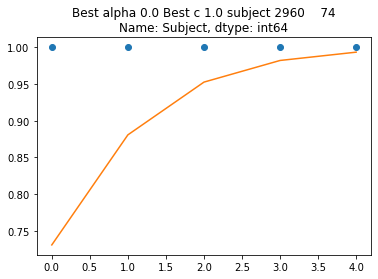

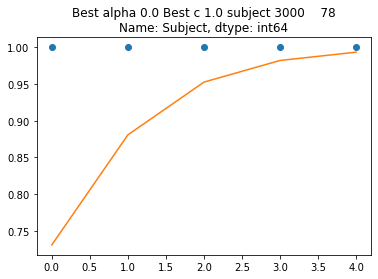

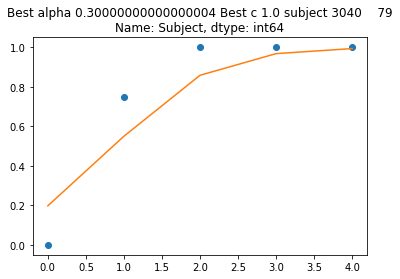

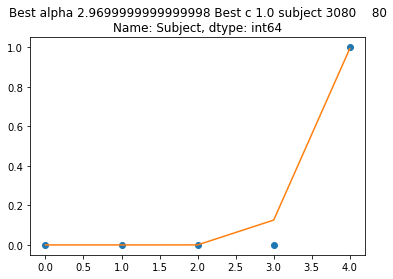

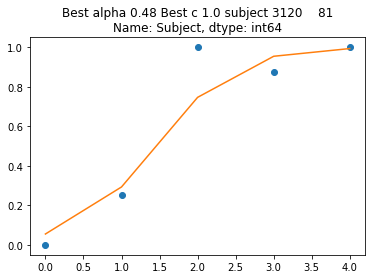

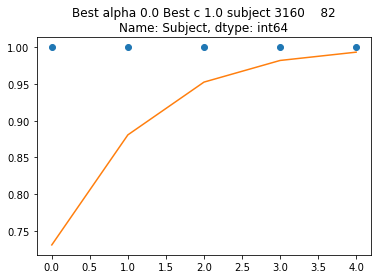

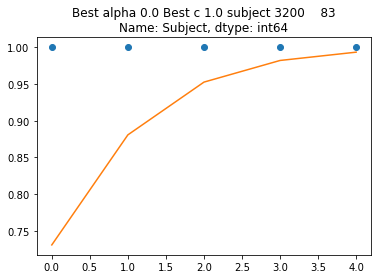

In [7]:
a.plot_all_x2()

In [18]:
print(a.best_alpha_list().count(0))

20


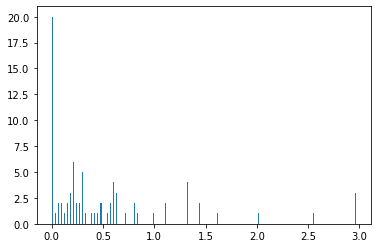

In [19]:
import matplotlib.pyplot as plt

plt.hist(a.best_alpha_list(), bins=300)
plt.show()

In [21]:
import scipy.stats as stats 
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(a.best_alpha_list())
print(fit_alpha, fit_loc, fit_beta)

0.2501130256997369 -1.2244757906471725e-28 0.795098373807217


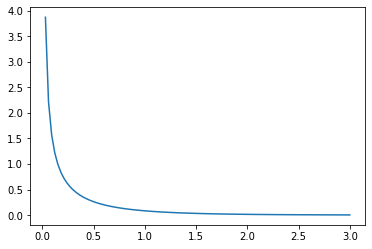

In [67]:
import numpy as np

#define x-axis values
x = np.linspace (0, 3, 100) 

#calculate pdf of Gamma distribution for each x-value
gamma = stats.gamma.pdf(x, a=fit_alpha, loc=0, scale=fit_beta)

#create plot of Gamma distribution
plt.plot(x,y)
plt.yscale('linear')

#display plot
plt.show()

[0.005551700208188759, 0.0138792505204719, 0.022900763358778633, 0.0138792505204719, 0.030534351145038177, 0.0, 0.007633587786259544, 0.018736988202637063, 0.014573213046495493, 0.0, 0.012491325468424708, 0.030534351145038177, 0.03331020124913255, 0.0027758501040943797, 0.025676613462873008, 0.025676613462873008, 0.0, 0.0020818875780707845, 0.0138792505204719, 0.010409437890353923, 0.0687022900763359, 0.0006939625260235949, 0.058986814712005564, 0.0, 0.00693962526023595, 0.0, 0.030534351145038177, 0.018736988202637063, 0.037473976405274126, 0.03331020124913255, 0.006245662734212354, 0.013185287994448304, 0.00693962526023595, 0.046495489243580865, 0.004857737682165165, 0.014573213046495493, 0.0, 0.004857737682165165, 0.004857737682165165, 0.0, 0.003469812630117975, 0.014573213046495493, 0.01943095072866066, 0.0, 0.016655100624566276, 0.006245662734212354, 0.011103400416377519, 0.00693962526023595, 0.004857737682165165, 0.0, 0.0, 0.003469812630117975, 0.0020818875780707845, 0.0, 0.0, 0.0

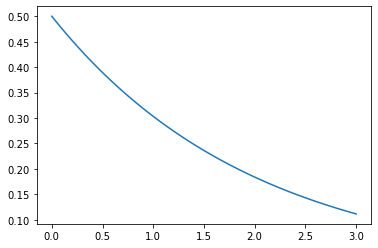

In [68]:
weib = stats.exponweib.pdf(x, *stats.exponweib.fit(a.best_alpha_list(), 1, 1, scale=2, loc=0))

normed = [x / sum(a.best_alpha_list()) for x in a.best_alpha_list()]

print(normed)

plt.plot(x, stats.exponweib.pdf(x, *stats.exponweib.fit(a.best_alpha_list(), 1, 1, scale=2, loc=0)))
#plt.hist(normed, bins=300);
plt.show()

In [69]:
import plotly.express as px
normed_hist = px.histogram(a.best_alpha_list(),nbins=10,range_x=[0,10],histnorm='probability')
normed_hist.add_scatter(x = x, y = gamma, mode = 'lines', name='gamma')
normed_hist.add_scatter(x = x, y = weib, mode = 'lines', name='weibull')
